In [1]:
# main_notebook.py
# =================
# Este script simula celdas de un notebook para ejecutar:
# 1) Carga de datos
# 2) Definición de VAE
# 3) Compilación y entrenamiento

# --- Cell 1: Imports
import tensorflow as tf
from  dataAcquisition_2 import get_data
from models.CVAE_2 import build_vae

# --- Cell 2: Carga y preprocesamiento de datos
# Ajusta val_split y mix_mode según necesites
data = get_data(val_split=0.1, mix_mode='average', num_classes=10, seed=3333)

x1_train = data['x1_train']
y1_train = data['y1_train']
x1_val   = data['x1_val']
y1_val   = data['y1_val']
x1_test  = data['x1_test']
y1_test  = data['y1_test']

x1_train = x1_train[:55000]
x1_val   = x1_train[55000:]
y1_train = y1_train[:55000]
y1_val   = y1_train[55000:]




In [2]:
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.losses import MeanSquaredError

from tensorflow.keras.optimizers import Adam
from models.Encoder_2 import build_encoder
from models.Decoder_2 import build_decoder
encoder = build_encoder()
decoder = build_decoder()


original_dim = 28 * 28  # para imágenes 28x28

def scaled_mse(y_true, y_pred):
    mse = MeanSquaredError()
    return mse(y_true, y_pred) * original_dim

vae = build_vae(encoder, decoder, beta=1.0)
vae.compile(optimizer=Adam(1e-3), loss=scaled_mse)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 68.1036
Epoch 2/5
 35/422 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 38.6572

C:\Users\galan\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 37.2012
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 33.8158
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 32.2120
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 31.3506
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


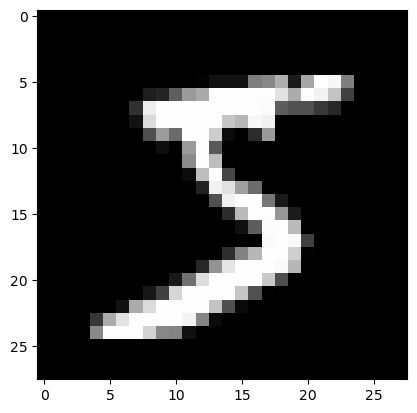

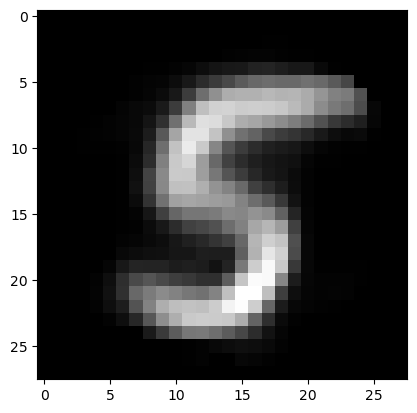

In [3]:

import matplotlib.pyplot as plt
import numpy as np

vae.fit(
    x=[x1_train, y1_train, y1_train],   # [imagen, cond_encoder, cond_decoder]
    y=x1_train,                         # target
    validation_data=([x1_val, y1_val, y1_val], x1_val ),
    epochs=5,
    batch_size=128
)
img = np.expand_dims(x1_train[0], axis=0)
cond = np.expand_dims(y1_train[0], axis=0)
salida = vae.predict([img, cond,cond ])
reconstruccion = salida[0].reshape(28, 28)

plt.imshow(x1_train[0], cmap='gray')
plt.show()
plt.imshow(reconstruccion, cmap='gray')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


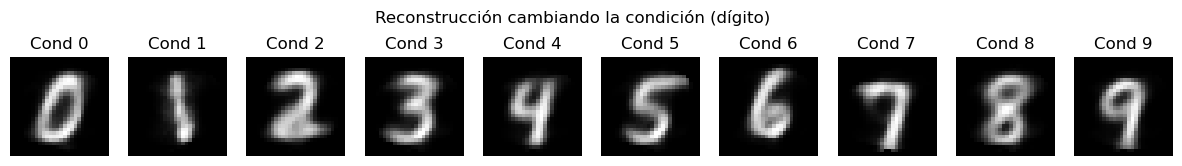

In [4]:
# Selecciona una imagen de prueba
import numpy as np
import matplotlib.pyplot as plt
img = np.expand_dims(x1_train[0], axis=0)

plt.figure(figsize=(15, 2))
for i in range(10):
    # Crea la condición one-hot para el dígito i
    cond = np.zeros((1, 10))
    cond[0, i] = 1

    # Predice usando la misma condición para encoder y decoder
    salida = vae.predict([img, cond,cond])
    reconstruccion = salida[0].reshape(28, 28)

    plt.subplot(1, 10, i + 1)
    plt.imshow(reconstruccion, cmap='gray')
    plt.title(f"Cond {i}")
    plt.axis('off')

plt.suptitle("Reconstrucción cambiando la condición (dígito)")
plt.show()